In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')

In [3]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
missing_values = df.isnull().sum()
missing_values

Transaction ID                 0
Customer ID                    0
Transaction Amount             0
Transaction Date and Time      0
Merchant Category              0
Location                       0
Previous Transaction Amount    0
Time Since Last Transaction    0
Device Type                    0
Fraud                          0
dtype: int64

In [8]:
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

df['Time Since Last Transaction'] = df['Time Since Last Transaction'] / 3600

df['Time Since Last Transaction'] = pd.to_timedelta(df['Time Since Last Transaction'].round (0))

In [9]:
print(df.dtypes)

Transaction ID                           int64
Customer ID                              int64
Transaction Amount                     float64
Transaction Date and Time       datetime64[ns]
Merchant Category                       object
Location                                object
Previous Transaction Amount            float64
Time Since Last Transaction    timedelta64[ns]
Device Type                             object
Fraud                                   object
dtype: object


In [10]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,0 days,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,0 days,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,0 days,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,0 days,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,0 days,mobile,No


In [11]:
df['Transaction Amount'] = df['Transaction Amount'].round(0)
df['Previous Transaction Amount'] = df['Previous Transaction Amount'].round(0)

In [25]:
df.head()

,Transaction ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,0.247882,2023-01-01 00:00:00,0,2,0.351458,0.0,0,0
1,2,-0.214661,2023-01-01 00:01:00,1,1,-0.162640,0.0,0,0
2,3,-0.152155,2023-01-01 00:02:00,1,4,-0.584080,0.0,0,0
3,4,0.460401,2023-01-01 00:03:00,2,2,1.899728,0.0,1,0
4,5,-0.702206,2023-01-01 00:04:00,2,2,-0.667770,0.0,1,0


In [13]:
df['Fraud'].value_counts(normalize=True) * 100

Fraud
No     86.08
Yes    13.92
Name: proportion, dtype: float64

In [14]:
df.drop(['Customer ID'], axis=1, inplace=True)
print(df.shape)

(10000, 9)


In [15]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

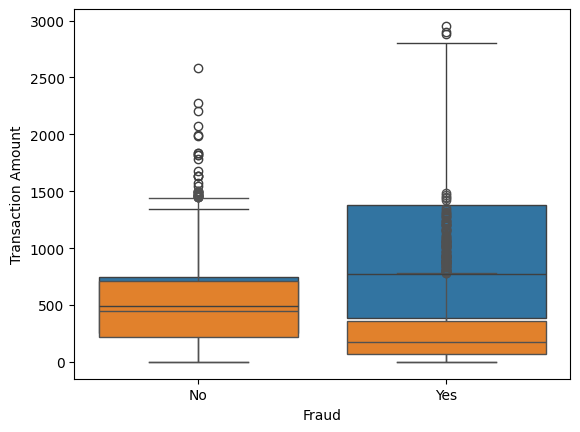

In [17]:
sns.boxplot(x='Fraud', y='Transaction Amount', data=df)
sns.boxplot(x='Fraud', y='Previous Transaction Amount', data=df)
plt.show()

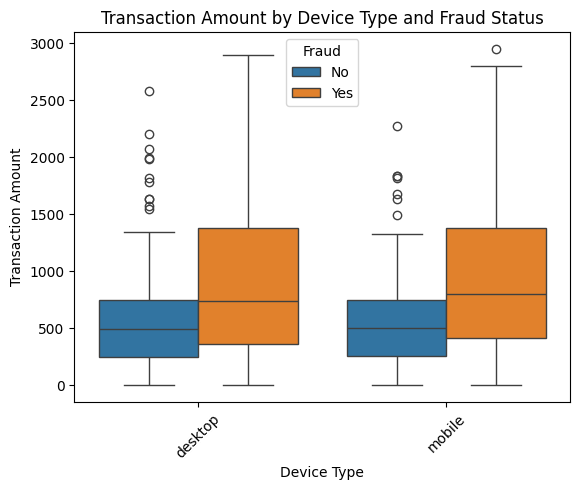

In [18]:
# Assuming 'Device Type' is another categorical variable you want to compare
sns.boxplot(x='Device Type', y='Transaction Amount', hue='Fraud', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Transaction Amount by Device Type and Fraud Status')
plt.show()

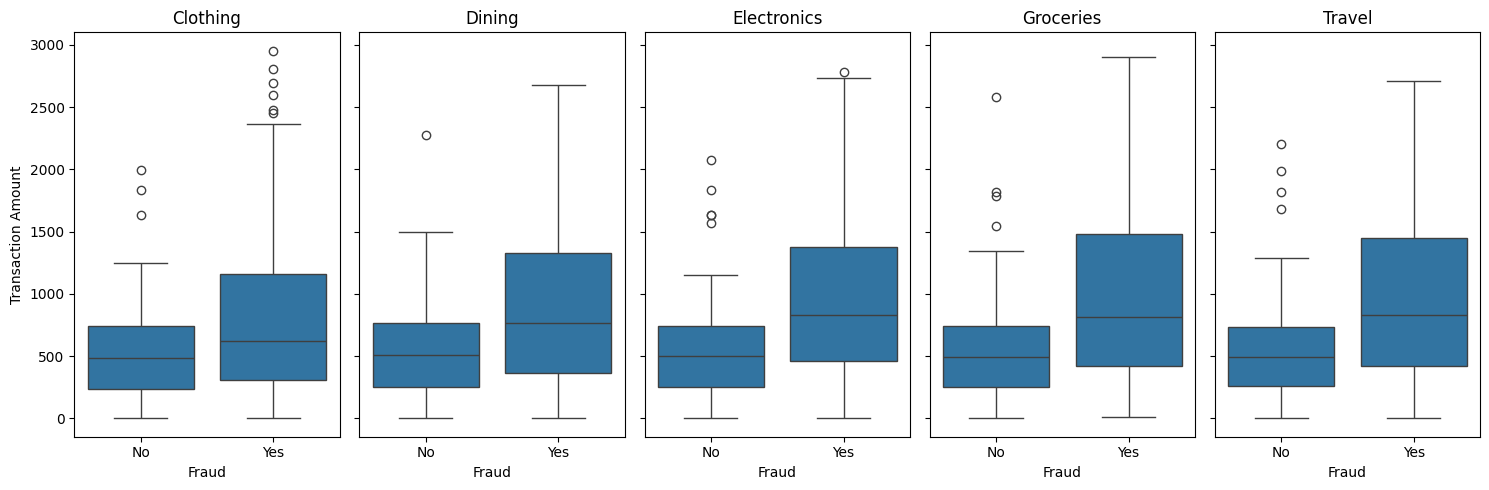

In [19]:
categories = df['Merchant Category'].unique()
fig, axes = plt.subplots(1, len(categories), figsize=(15, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.boxplot(x='Fraud', y='Transaction Amount', data=df[df['Merchant Category'] == category], ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Fraud')
    ax.set_ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [20]:
import numpy as np

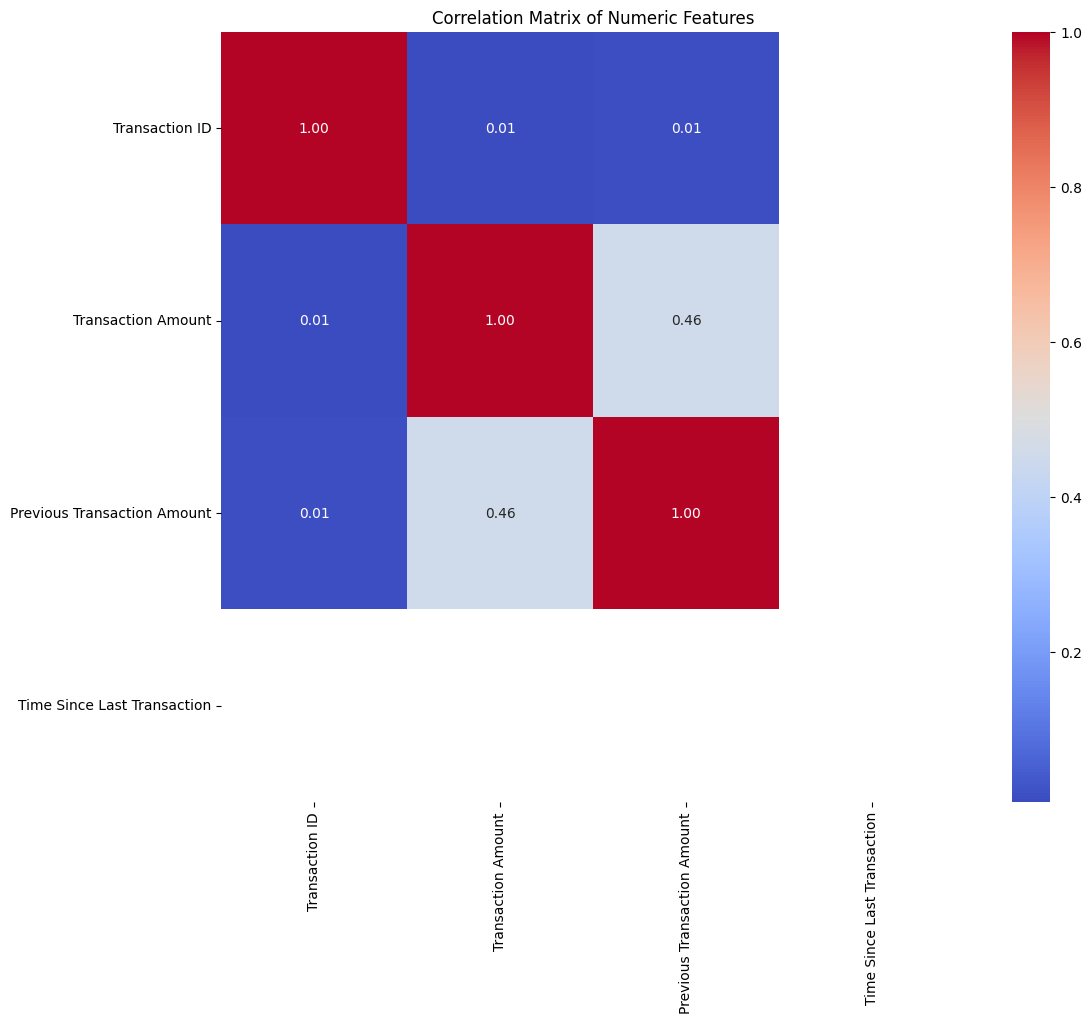

In [21]:
columns_to_plot = ['Transaction ID', 'Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction']

corr_matrix = df[columns_to_plot].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [26]:
X = df.iloc[:, :7]
y = df['Fraud']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [29]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=123)

In [33]:
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])
df['Year'] = df['Transaction Date and Time'].dt.year
df['Month'] = df['Transaction Date and Time'].dt.month
df['Day'] = df['Transaction Date and Time'].dt.day
df['Hour'] = df['Transaction Date and Time'].dt.hour
df['Minute'] = df['Transaction Date and Time'].dt.minute
df = df.drop(columns=['Transaction Date and Time'])

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [37]:
categorical_features = ['Merchant Category', 'Location', 'Device Type', 'Fraud']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [38]:
categorical_data = df[categorical_features]
encoded_categorical_data = one_hot_encoder.fit_transform(categorical_data)

In [39]:
df_encoded = df.drop(columns=categorical_features)
df_encoded = pd.concat([df_encoded, pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out())], axis=1)

In [41]:
print("Columns in df_encoded:", df_encoded.columns)

Columns in df_encoded: Index(['Transaction ID', 'Transaction Amount', 'Previous Transaction Amount',
       'Time Since Last Transaction', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Merchant Category_0', 'Merchant Category_1', 'Merchant Category_2',
       'Merchant Category_3', 'Merchant Category_4', 'Location_0',
       'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Device Type_0',
       'Device Type_1', 'Fraud_0', 'Fraud_1'],
      dtype='object')


In [44]:
X = df_encoded.drop(columns=['Fraud_0', 'Fraud_1'])  # Assuming 'Fraud' is your target and has been one-hot encoded
y = df_encoded['Fraud_1']  # Binary classification

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X, y, scoring='f1', cv=5)
    print(f"{model_name} F1 Scores: {scores}")
    print(f"{model_name} Mean F1 Score: {scores.mean()}\n")

KNN F1 Scores: [0.41192412 0.43915344 0.46073298 0.47570332 0.43850267]
KNN Mean F1 Score: 0.44520330825856014

Logistic Regression F1 Scores: [0.62953995 0.63809524 0.62200957 0.64941176 0.62801932]
Logistic Regression Mean F1 Score: 0.6334151694848916

Naive Bayes F1 Scores: [0.54873646 0.52277228 0.55030801 0.54958678 0.5664488 ]
Naive Bayes Mean F1 Score: 0.5475704652275123

Decision Tree F1 Scores: [0.24325603 0.4547619  0.56140351 0.58782609 0.46959459]
Decision Tree Mean F1 Score: 0.46336842583194526



In [61]:
X = df[['Transaction Amount', 'Merchant Category', 'Location', 'Previous Transaction Amount', 
        'Time Since Last Transaction', 'Device Type', 'Year', 'Month', 'Day', 'Hour', 'Minute']]
y = df['Fraud']

X = X.apply(pd.to_numeric, errors='coerce')

In [68]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
param_grids = {
    'logistic_regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']  }}

In [76]:
lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grids['logistic_regression'], scoring='f1', cv=5, error_score='raise')
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [78]:
best_lr = grid_search_lr.best_estimator_

In [79]:
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', best_lr)  
])

In [80]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [81]:
y_pred = final_pipeline.predict(X_test)

In [82]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1736
           1       0.97      0.46      0.63       264

    accuracy                           0.93      2000
   macro avg       0.95      0.73      0.79      2000
weighted avg       0.93      0.93      0.92      2000



In [83]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1732    4]
 [ 142  122]]
